In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np


In [2]:
df = pd.read_excel('emdat.xlsx')

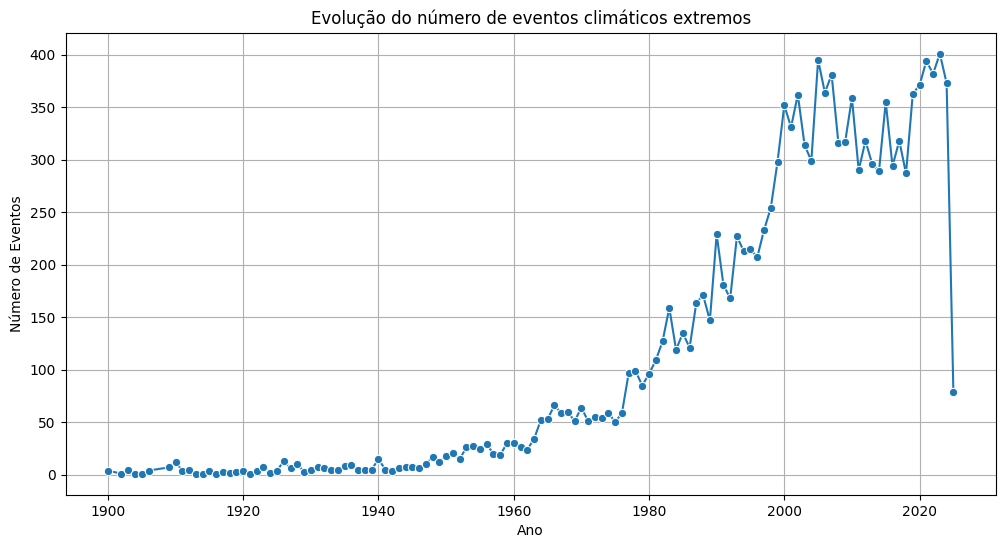

In [3]:

eventos_por_ano = df['Start Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=eventos_por_ano.index, y=eventos_por_ano.values, marker='o')
plt.title('Evolução do número de eventos climáticos extremos')
plt.xlabel('Ano')
plt.ylabel('Número de Eventos')
plt.grid()
plt.show()


/tmp/ipython-input-4-3208581371.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=eventos_por_tipo.values, y=eventos_por_tipo.index, palette='viridis')


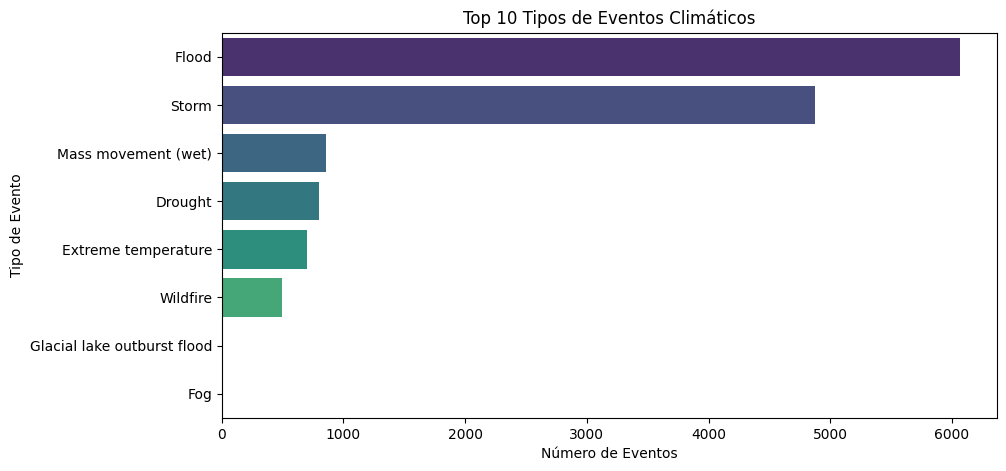

In [4]:
# Contagem por tipo
eventos_por_tipo = df['Disaster Type'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=eventos_por_tipo.values, y=eventos_por_tipo.index, palette='viridis')
plt.title('Top 10 Tipos de Eventos Climáticos')
plt.xlabel('Número de Eventos')
plt.ylabel('Tipo de Evento')
plt.show()


/tmp/ipython-input-5-1911753810.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prejuizo_por_tipo.values, y=prejuizo_por_tipo.index, palette='rocket')


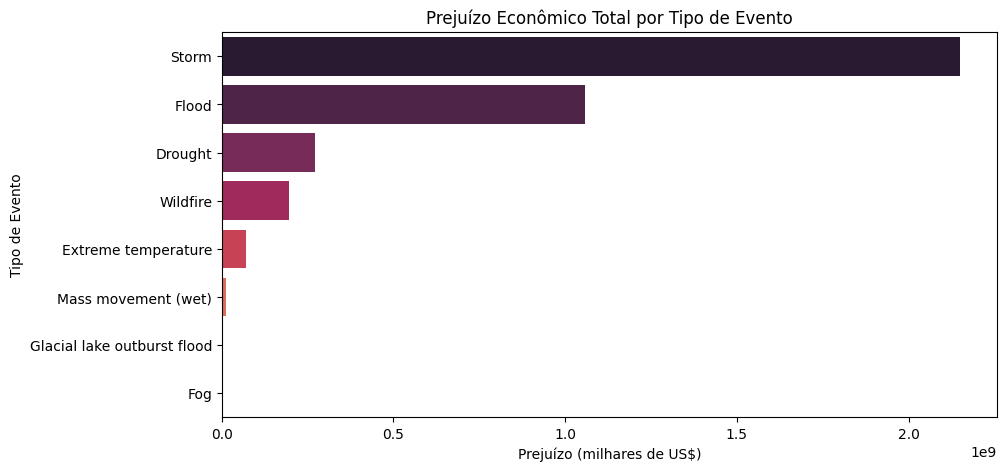

In [5]:
# Soma dos prejuízos por tipo
prejuizo_por_tipo = df.groupby('Disaster Type')['Total Damage (' + "'000 US$)" + ''].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=prejuizo_por_tipo.values, y=prejuizo_por_tipo.index, palette='rocket')
plt.title('Prejuízo Econômico Total por Tipo de Evento')
plt.xlabel('Prejuízo (milhares de US$)')
plt.ylabel('Tipo de Evento')
plt.show()


/tmp/ipython-input-6-3302753858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=eventos_por_pais.values, y=eventos_por_pais.index, palette='magma')


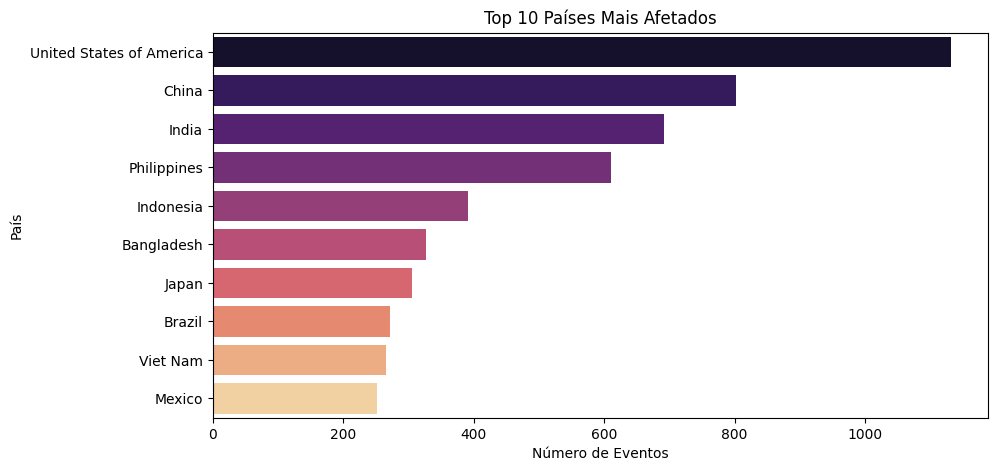

In [6]:
eventos_por_pais = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=eventos_por_pais.values, y=eventos_por_pais.index, palette='magma')
plt.title('Top 10 Países Mais Afetados')
plt.xlabel('Número de Eventos')
plt.ylabel('País')
plt.show()


In [7]:
fig = px.scatter_geo(df, lat='Latitude', lon='Longitude',
                     color='Disaster Type',
                     hover_name='Country',
                     size_max=10,
                     title='Distribuição Geográfica dos Eventos Climáticos')
fig.show()


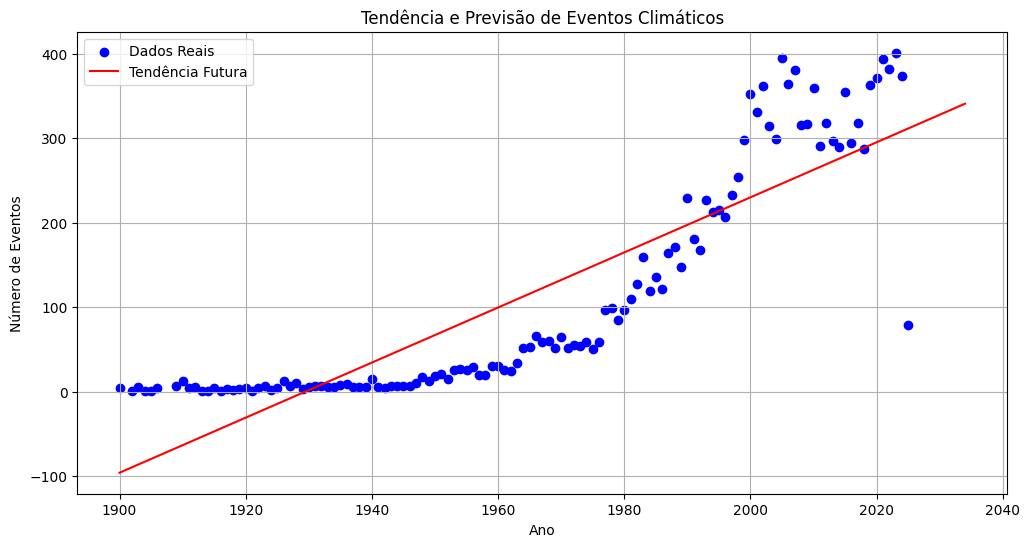

In [8]:
# Tendência linear simples
eventos_ano = df['Start Year'].value_counts().sort_index()
X = eventos_ano.index.values.reshape(-1, 1)
y = eventos_ano.values

modelo = LinearRegression()
modelo.fit(X, y)

# Predição para anos futuros
anos_futuros = np.arange(X.min(), X.max()+10).reshape(-1,1)
pred = modelo.predict(anos_futuros)

# Plot
plt.figure(figsize=(12,6))
plt.scatter(X, y, color='blue', label='Dados Reais')
plt.plot(anos_futuros, pred, color='red', label='Tendência Futura')
plt.title('Tendência e Previsão de Eventos Climáticos')
plt.xlabel('Ano')
plt.ylabel('Número de Eventos')
plt.legend()
plt.grid()
plt.show()


/tmp/ipython-input-9-458946885.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




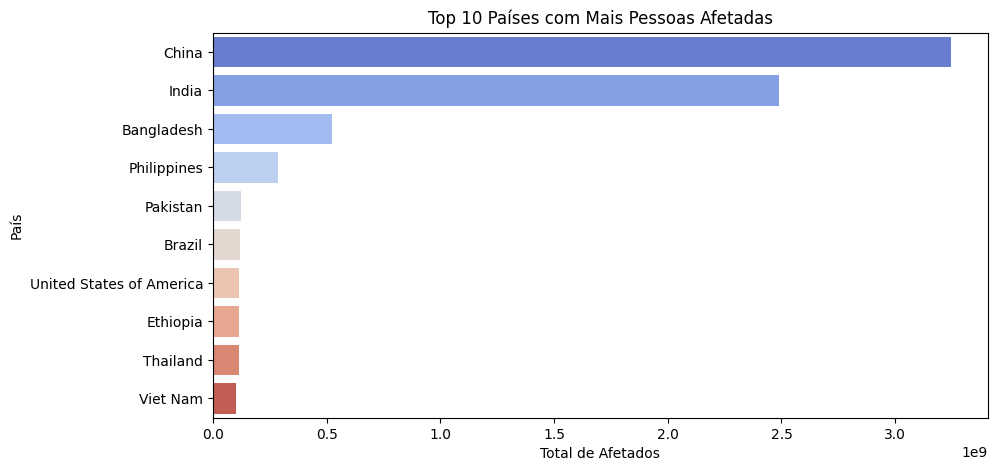

In [9]:
afetados_por_pais = df.groupby('Country')['Total Affected'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=afetados_por_pais.values, y=afetados_por_pais.index, palette='coolwarm')
plt.title('Top 10 Países com Mais Pessoas Afetadas')
plt.xlabel('Total de Afetados')
plt.ylabel('País')
plt.show()


/tmp/ipython-input-10-2154487792.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




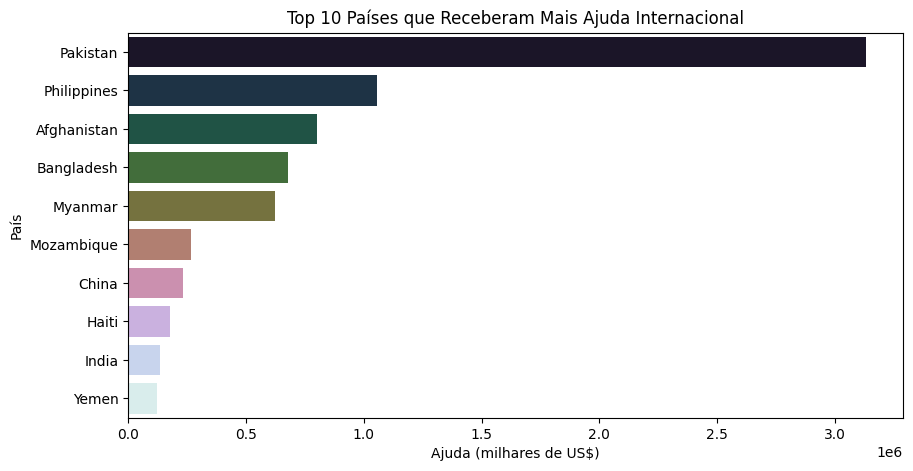

In [10]:
ajuda_por_pais = df.groupby('Country')["AID Contribution ('000 US$)"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=ajuda_por_pais.values, y=ajuda_por_pais.index, palette='cubehelix')
plt.title('Top 10 Países que Receberam Mais Ajuda Internacional')
plt.xlabel('Ajuda (milhares de US$)')
plt.ylabel('País')
plt.show()


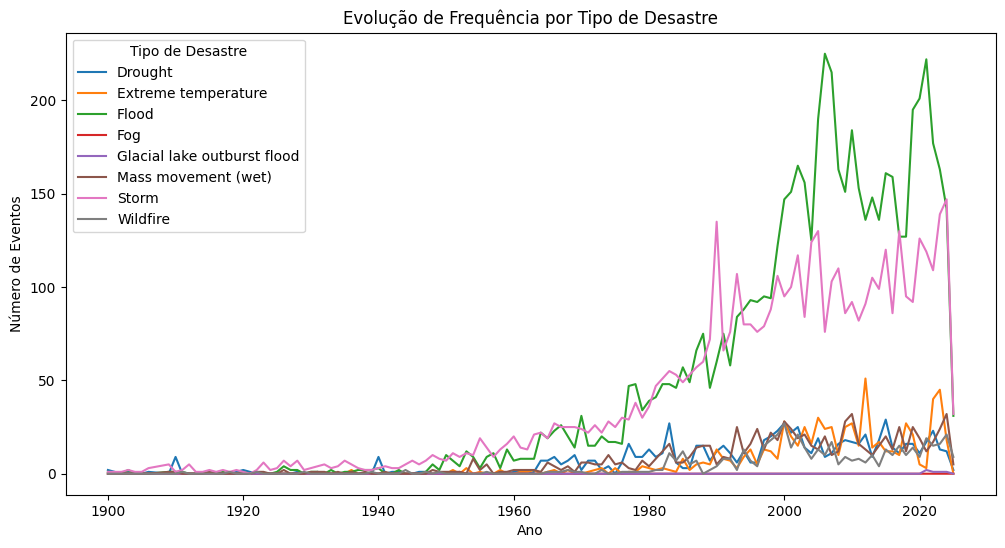

In [11]:
tipos_freq = df.groupby(['Start Year', 'Disaster Type']).size().unstack(fill_value=0)

tipos_freq.plot(figsize=(12,6))
plt.title('Evolução de Frequência por Tipo de Desastre')
plt.xlabel('Ano')
plt.ylabel('Número de Eventos')
plt.legend(title='Tipo de Desastre')
plt.show()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


df = df[['Country', 'Region', 'Latitude', 'Longitude', 'Start Year', 'Start Month',
         'Disaster Type', 'Magnitude', 'Total Affected']].dropna()

df['Desastre'] = 1

features = df[['Country', 'Region', 'Latitude', 'Longitude', 'Start Year',
               'Start Month', 'Disaster Type', 'Magnitude', 'Total Affected']]

le_country = LabelEncoder()
le_region = LabelEncoder()
le_type = LabelEncoder()

features['Country'] = le_country.fit_transform(features['Country'])
features['Region'] = le_region.fit_transform(features['Region'])
features['Disaster Type'] = le_type.fit_transform(features['Disaster Type'])

X = features
y = df['Desastre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestClassifier(n_estimators=200, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


/tmp/ipython-input-12-573142097.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-12-573142097.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-12-573142097.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Relatório de Classificação:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       174

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174

Matriz de Confusão:
[[174]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.



In [ ]:
entrada = pd.DataFrame({
    'Country': [le_country.transform(['Brazil'])[0]],
    'Region': [le_region.transform(['Americas'])[0]],
    'Latitude': [-10],
    'Longitude': [-55],
    'Start Year': [2026],
    'Start Month': [1],
    'Disaster Type': [le_type.transform(['Flood'])[0]],
    'Magnitude': [5.0],
    'Total Affected': [1000]
})

prob = modelo.predict_proba(entrada)

print(f'Probabilidade de ocorrer um desastre nesta condição: {prob[0][1]*100:.2f}%')
